<a href="https://colab.research.google.com/github/Ifra96/820-BDP/blob/main/BDP_Russia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 9.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re
import pandas as pd
#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [ ]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving Putin-address-.txt to Putin-address-.txt


In [ ]:
f = open("Putin-address-.txt", "r") #read
print(f.read())

Mr. President, Mr. Secretary-General, colleagues, ladies and gentlemen,
This year, the international community celebrates two, without exaggeration, historic anniversaries: the 75th anniversary of the end of the Second World War and establishment of the United Nations.
The importance of these two forever interlinked events cannot be overemphasized. In 1945, Nazism was defeated, the ideology of aggression and hatred was crushed, and the experience and spirit of alliance, as well as the awareness of the huge price that had been paid for peace and our common Victory, helped construct the post-war world order. It was built on the ultimate foundation of the UN Charter that remains the main source of international law to this day.
I am convinced that this anniversary makes it incumbent upon all of us to recall the timeless principles of inter-State communication enshrined in the UN Charter and formulated by the founding fathers of our universal Organization in the clearest and most unambiguo

In [ ]:
import pandas as pd
df = pd.read_csv("Putin-address-.txt",delimiter="\t",header=None,names=["text"])

In [ ]:
df

,text
0,"Mr. President, Mr. Secretary-General, colleagu..."
1,"This year, the international community celebra..."
2,The importance of these two forever interlinke...
3,I am convinced that this anniversary makes it ...
4,"Looking back at the past decades, one can say ..."
5,This enormous potential and expertise of the U...
6,The current changes certainly have an effect o...
7,Such a right pertaining to the five nuclear po...
8,"As diplomatic practice shows, this instrument ..."
9,Forgetting the lessons of history is short-sig...


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'like', 'un','use', 'not', 'would', 'say', 'could', 'excellency', 'one','_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
stop_words.add("like")
stop_words.add("un")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [ ]:
df

,text,token,clean,stems,polarity,subjectivity
0,mr president mr secretary general colleagues ladies and gentlemen,"[mr, president, mr, secretary, general, colleagues, ladies, and, gentlemen]","[mr, president, mr, secretary, general, colleagues, ladies, gentlemen]","[mr, president, mr, secretary, general, colleague, lady, gentleman]",0.050000,0.500000
1,this year the international community celebrates two without exaggeration historic anniversaries...,"[this, year, the, international, community, celebrates, two, without, exaggeration, historic, an...","[year, international, community, celebrates, two, without, exaggeration, historic, anniversaries...","[year, international, community, celebrate, two, without, exaggeration, historic, anniversary, 7...",0.000000,0.000000
2,the importance of these two forever interlinked events cannot be overemphasized in 1945 nazism w...,"[the, importance, of, these, two, forever, interlinked, events, can, not, be, overemphasized, in...","[importance, two, forever, interlinked, events, overemphasized, 1945, nazism, defeated, ideology...","[importance, two, forever, interlink, event, overemphasize, 1945, nazism, defeated, ideology, ag...",0.027778,0.472222
3,i am convinced that this anniversary makes it incumbent upon all of us to recall the timeless pr...,"[i, am, convinced, that, this, anniversary, makes, it, incumbent, upon, all, of, us, to, recall,...","[convinced, anniversary, makes, incumbent, upon, us, recall, timeless, principles, inter, state,...","[convince, anniversary, make, incumbent, upon, us, recall, timeless, principle, inter, state, co...",0.197959,0.337245
4,looking back at the past decades one can say that despite all difficulties of the cold war perio...,"[looking, back, at, the, past, decades, one, can, say, that, despite, all, difficulties, of, the...","[looking, back, past, decades, one, say, despite, difficulties, cold, war, period, major, geopol...","[looking, back, past, decade, one, say, despite, difficulty, cold, war, period, major, geopoliti...",-0.041071,0.339286
5,this enormous potential and expertise of the un is relevant and serves as a solid basis for movi...,"[this, enormous, potential, and, expertise, of, the, un, is, relevant, and, serves, as, a, solid...","[enormous, potential, expertise, relevant, serves, solid, basis, moving, ahead, international, o...","[enormous, potential, expertise, un, relevant, serve, solid, basis, move, ahead, like, internati...",0.073901,0.513462
6,the current changes certainly have an effect on the principal un body the security council as we...,"[the, current, changes, certainly, have, an, effect, on, the, principal, un, body, the, security...","[current, changes, certainly, effect, principal, body, security, council, well, debate, concerni...","[current, change, certainly, effect, principal, un, body, security, council, well, debate, conce...",-0.012245,0.513776
7,such a right pertaining to the five nuclear powers the victors of the second world war remains i...,"[such, a, right, pertaining, to, the, five, nuclear, powers, the, victors, of, the, second, worl...","[right, pertaining, five, nuclear, powers, victors, second, world, war, remains, indicative, act...","[right, pertain, five, nuclear, power, victor, second, world, war, remains, indicative, actual, ...",-0.004517,0.360924
8,as diplomatic practice shows this instrument actually works unlike the infamous pre war league o...,"[as, diplomatic, practice, shows, this, instrument, actually, works, unlike, the, infamous, pre,...","[diplomatic, practice, shows, instrument, actually, works, unlike, infamous, pre, war, league, n...","[diplomatic, practice, show, instrument, actually, works, unlike, infamous, pre, war, league, na...",-0.037857,0.507143
9,forgetting the lessons of history is short sighted and extremely irresponsible just like the pol...,"[forgetting, the, lessons, of, history, is, short, sighted, and, extremely, irresponsible, just,...","[forgetting, lessons, history,

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,text,token,clean,stems,polarity,subjectivity
0,mr president mr secretary general colleagues ladies and gentlemen,"[mr, president, mr, secretary, general, colleagues, ladies, and, gentlemen]","[mr, president, mr, secretary, general, colleagues, ladies, gentlemen]","[mr, president, mr, secretary, general, colleague, lady, gentleman]",0.050000,0.500000
1,this year the international community celebrates two without exaggeration historic anniversaries...,"[this, year, the, international, community, celebrates, two, without, exaggeration, historic, an...","[year, international, community, celebrates, two, without, exaggeration, historic, anniversaries...","[year, international, community, celebrate, two, without, exaggeration, historic, anniversary, 7...",0.000000,0.000000
2,the importance of these two forever interlinked events cannot be overemphasized in 1945 nazism w...,"[the, importance, of, these, two, forever, interlinked, events, can, not, be, overemphasized, in...","[importance, two, forever, interlinked, events, overemphasized, 1945, nazism, defeated, ideology...","[importance, two, forever, interlink, event, overemphasize, 1945, nazism, defeated, ideology, ag...",0.027778,0.472222
3,i am convinced that this anniversary makes it incumbent upon all of us to recall the timeless pr...,"[i, am, convinced, that, this, anniversary, makes, it, incumbent, upon, all, of, us, to, recall,...","[convinced, anniversary, makes, incumbent, upon, us, recall, timeless, principles, inter, state,...","[convince, anniversary, make, incumbent, upon, us, recall, timeless, principle, inter, state, co...",0.197959,0.337245
4,looking back at the past decades one can say that despite all difficulties of the cold war perio...,"[looking, back, at, the, past, decades, one, can, say, that, despite, all, difficulties, of, the...","[looking, back, past, decades, one, say, despite, difficulties, cold, war, period, major, geopol...","[looking, back, past, decade, one, say, despite, difficulty, cold, war, period, major, geopoliti...",-0.041071,0.339286
5,this enormous potential and expertise of the un is relevant and serves as a solid basis for movi...,"[this, enormous, potential, and, expertise, of, the, un, is, relevant, and, serves, as, a, solid...","[enormous, potential, expertise, relevant, serves, solid, basis, moving, ahead, international, o...","[enormous, potential, expertise, relevant, serve, solid, basis, move, ahead, international, orga...",0.073901,0.513462
6,the current changes certainly have an effect on the principal un body the security council as we...,"[the, current, changes, certainly, have, an, effect, on, the, principal, un, body, the, security...","[current, changes, certainly, effect, principal, body, security, council, well, debate, concerni...","[current, change, certainly, effect, principal, body, security, council, well, debate, concern, ...",-0.012245,0.513776
7,such a right pertaining to the five nuclear powers the victors of the second world war remains i...,"[such, a, right, pertaining, to, the, five, nuclear, powers, the, victors, of, the, second, worl...","[right, pertaining, five, nuclear, powers, victors, second, world, war, remains, indicative, act...","[right, pertain, five, nuclear, power, victor, second, world, war, remains, indicative, actual, ...",-0.004517,0.360924
8,as diplomatic practice shows this instrument actually works unlike the infamous pre war league o...,"[as, diplomatic, practice, shows, this, instrument, actually, works, unlike, the, infamous, pre,...","[diplomatic, practice, shows, instrument, actually, works, unlike, infamous, pre, war, league, n...","[diplomatic, practice, show, instrument, actually, works, unlike, infamous, pre, war, league, na...",-0.037857,0.507143
9,forgetting the lessons of history is short sighted and extremely irresponsible just like the pol...,"[forgetting, the, lessons, of, history, is, short, sighted, and, extremely, irresponsible, just,...","[forgetting, lessons, history,

In [ ]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt##


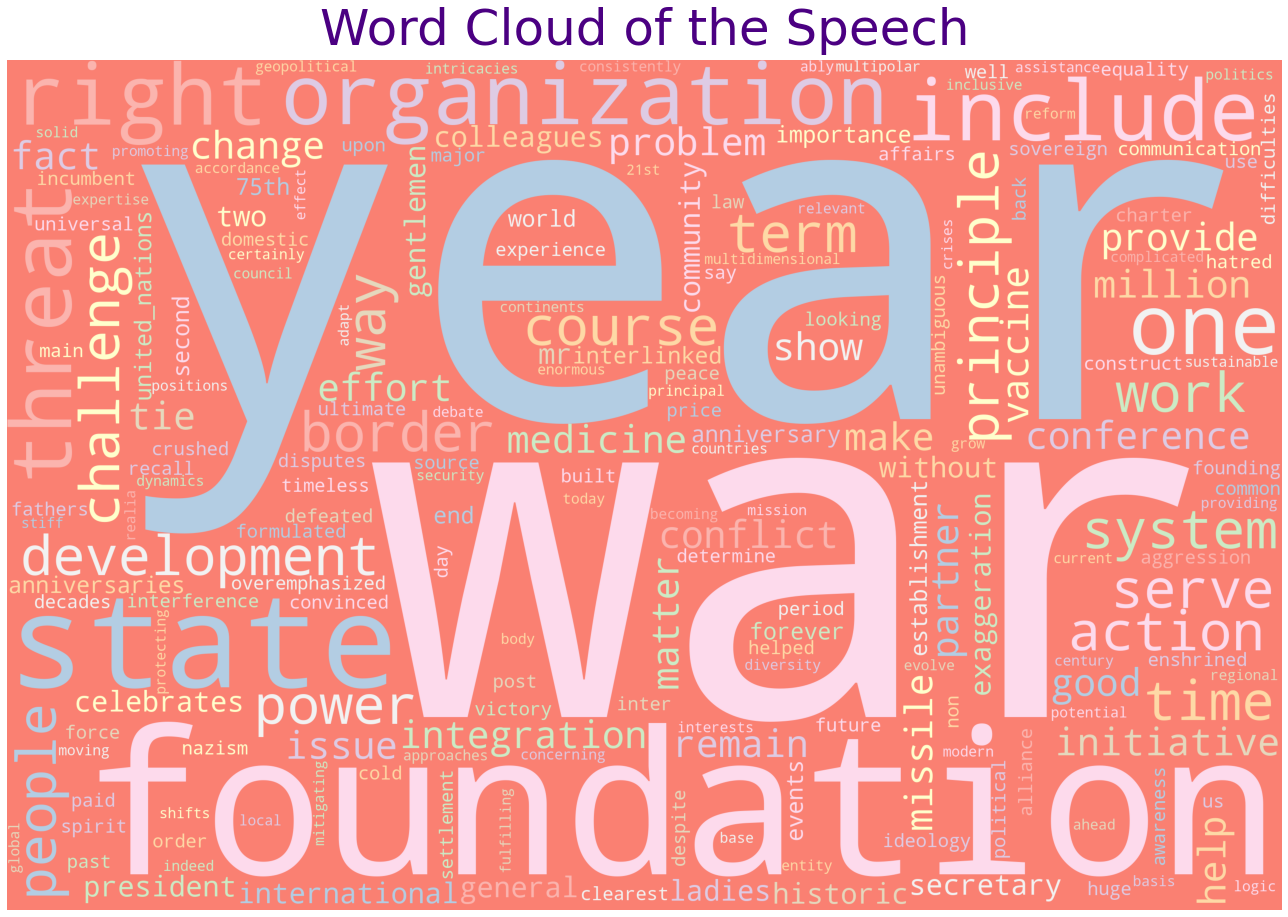

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)
plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)
plt.savefig('plot_wordcloud', dpi = 300, bbox_inches = 'tight')



In [ ]:
text_data = list(df['clean'])

In [ ]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(text_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.026*"international" + 0.015*"would" + 0.014*"principles" + 0.013*"summit" + 0.010*"future" + 0.010*"security" + 0.010*"provide" + 0.009*"law" + 0.009*"fully" + 0.008*"responsibility"'), (1, '0.012*"people" + 0.011*"also" + 0.010*"new" + 0.010*"would" + 0.009*"pandemic" + 0.007*"work" + 0.007*"long" + 0.007*"global" + 0.007*"countries" + 0.006*"trade"'), (2, '0.014*"russia" + 0.010*"us" + 0.007*"colleagues" + 0.007*"space" + 0.007*"use" + 0.006*"provide" + 0.006*"first" + 0.005*"partners" + 0.005*"treaty" + 0.005*"outer"'), (3, '0.019*"well" + 0.015*"peace" + 0.011*"would" + 0.011*"peoples" + 0.009*"wish" + 0.009*"planet" + 0.007*"issues" + 0.007*"efforts" + 0.007*"military" + 0.006*"stability"')]


In [ ]:
import gensim # Print the Keyword in the 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.013*"new" + 0.013*"people" + 0.009*"states" + 0.009*"need" + 0.009*"right" + 0.009*"restrictions" + 0.009*"work" + 0.009*"even" + 0.009*"pandemic" + 0.009*"long"')
(1, '0.011*"global" + 0.011*"would" + 0.011*"unemployment" + 0.011*"sanctions" + 0.011*"trade" + 0.006*"long" + 0.006*"even" + 0.006*"experts" + 0.006*"term" + 0.006*"pandemic"')
(2, '0.021*"would" + 0.011*"provide" + 0.011*"regional" + 0.007*"russia" + 0.007*"dangerous" + 0.007*"staff" + 0.007*"foundation" + 0.007*"stability" + 0.007*"serious" + 0.007*"coronavirus"')
(3, '0.019*"international" + 0.015*"world" + 0.015*"space" + 0.015*"russia" + 0.015*"provide" + 0.010*"would" + 0.010*"outer" + 0.010*"experience" + 0.010*"vaccine" + 0.010*"need"')
(4, '0.021*"security" + 0.017*"council" + 0.013*"international" + 0.013*"well" + 0.009*"important" + 0.009*"states" + 0.009*"work" + 0.009*"possible" + 0.008*"permanent" + 0.008*"summit"')
(5, '0.010*"war" + 0.010*"world" + 0.010*"second" + 0.010*"course" + 0.010*"short" + 0.

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9154,"russia, us, colleagues, space, use, provide, first, partners, treaty, outer","[mr, president, mr, secretary, general, colleagues, ladies, gentlemen]"
1,1,0.0,0.9563,"international, would, principles, summit, future, security, provide, law, fully, responsibility","[year, international, community, celebrates, two, without, exaggeration, historic, anniversaries..."
2,2,3.0,0.9813,"well, peace, would, peoples, wish, planet, issues, efforts, military, stability","[importance, two, forever, interlinked, events, overemphasized, 1945, nazism, defeated, ideology..."
3,3,2.0,0.7670,"russia, us, colleagues, space, use, provide, first, partners, treaty, outer","[convinced, anniversary, makes, incumbent, upon, us, recall, timeless, principles, inter, state,..."
4,4,3.0,0.9777,"well, peace, would, peoples, wish, planet, issues, efforts, military, stability","[looking, back, past, decades, one, say, despite, difficulties, cold, war, period, major, geopol..."
5,5,1.0,0.9219,"people, also, new, would, pandemic, work, long, global, countries, trade","[enormous, potential, expertise, relevant, serves, solid, basis, moving, ahead, international, o..."
6,6,0.0,0.9832,"international, would, principles, summit, future, security, provide, law, fully, responsibility","[current, changes, certainly, effect, principal, body, security, council, well, debate, concerni..."
7,7,3.0,0.9858,"well, peace, would, peoples, wish, planet, issues, efforts, military, stability","[right, pertaining, five, nuclear, powers, victors, second, world, war, remains, indicative, act..."
8,8,3.0,0.9708,"well, peace, would, peoples, wish, planet, issues, efforts, military, stability","[diplomatic, practice, shows, instrument, actually, works, unlike, infamous, pre, war, league, n..."
9,9,2.0,0.9726,"russia, us, colleagues, space, use, provide, first, partners, treaty, outer","[forgetting, lessons, history, short, sighted, extremely, irresponsible, politicized, attempts, ..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9832,"international, would, principles, summit, future, security, provide, law, fully, responsibility","[current, changes, certainly, effect, principal, body, security, council, well, debate, concerni..."
1,1.0,0.9851,"people, also, new, would, pandemic, work, long, global, countries, trade","[general, freeing, world, trade, barriers, bans, restrictions, illegitimate, sanctions, would, g..."
2,2.0,0.9783,"russia, us, colleagues, space, use, provide, first, partners, treaty, outer","[dangerous, virus, affect, anyone, coronavirus, struck, staff, united_nations, headquarters, reg..."
3,3.0,0.9858,"well, peace, would, peoples, wish, planet, issues, efforts, military, stability","[right, pertaining, five, nuclear, powers, victors, second, world, war, remains, indicative, act..."


In [ ]:
pip install pyLDAvis #using plydavis to interpret topics

In [ ]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)



/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus

In [ ]:
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.3499958762554769


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    ss = TextBlob(text).sentiment.polarity
    return ss

def analyze_subjectivity(text):
    ss = TextBlob(text).sentiment.subjectivity
    return ss

In [ ]:
df['polarity'] = np.array([ analyze_sentiment(text) for text in df['text'] ])
df['subjectivity'] = np.array([ analyze_subjectivity(text) for text in df['text'] ])
df.head()

,text,token,clean,stems,polarity,subjectivity
0,mr president mr secretary general colleagues ladies and gentlemen,"[mr, president, mr, secretary, general, colleagues, ladies, and, gentlemen]","[mr, president, mr, secretary, general, colleagues, ladies, gentlemen]","[mr, president, mr, secretary, general, colleague, lady, gentleman]",0.050000,0.500000
1,this year the international community celebrates two without exaggeration historic anniversaries...,"[this, year, the, international, community, celebrates, two, without, exaggeration, historic, an...","[year, international, community, celebrates, two, without, exaggeration, historic, anniversaries...","[year, international, community, celebrate, two, without, exaggeration, historic, anniversary, 7...",0.000000,0.000000
2,the importance of these two forever interlinked events cannot be overemphasized in 1945 nazism w...,"[the, importance, of, these, two, forever, interlinked, events, can, not, be, overemphasized, in...","[importance, two, forever, interlinked, events, overemphasized, 1945, nazism, defeated, ideology...","[importance, two, forever, interlink, event, overemphasize, 1945, nazism, defeated, ideology, ag...",0.027778,0.472222
3,i am convinced that this anniversary makes it incumbent upon all of us to recall the timeless pr...,"[i, am, convinced, that, this, anniversary, makes, it, incumbent, upon, all, of, us, to, recall,...","[convinced, anniversary, makes, incumbent, upon, us, recall, timeless, principles, inter, state,...","[convince, anniversary, make, incumbent, upon, us, recall, timeless, principle, inter, state, co...",0.197959,0.337245
4,looking back at the past decades one can say that despite all difficulties of the cold war perio...,"[looking, back, at, the, past, decades, one, can, say, that, despite, all, difficulties, of, the...","[looking, back, past, decades, one, say, despite, difficulties, cold, war, period, major, geopol...","[looking, back, past, decade, one, say, despite, difficulty, cold, war, period, major, geopoliti...",-0.041071,0.339286


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6fe813b90>]],
      dtype=object)

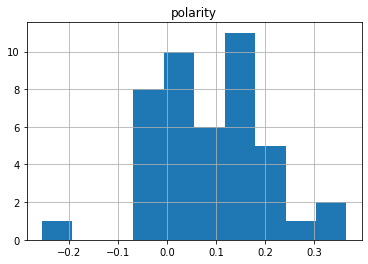

In [ ]:
df.hist(column='polarity')

In [ ]:
df["polarity"].mean()

0.08217492856405353

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6fa08ab50>]],
      dtype=object)

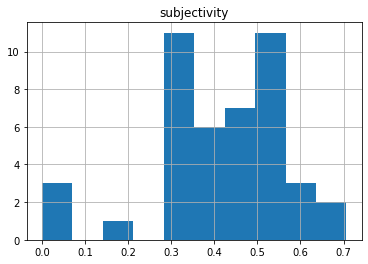

In [ ]:
df.hist(column='subjectivity')

In [ ]:
df["subjectivity"].mean()

0.4123942739815782

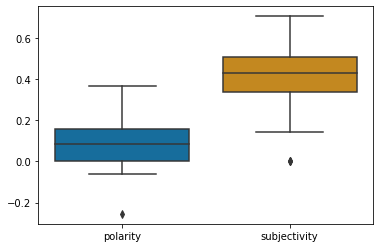

In [ ]:
import seaborn as sns
sns.boxplot(data = df,palette="colorblind")